In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


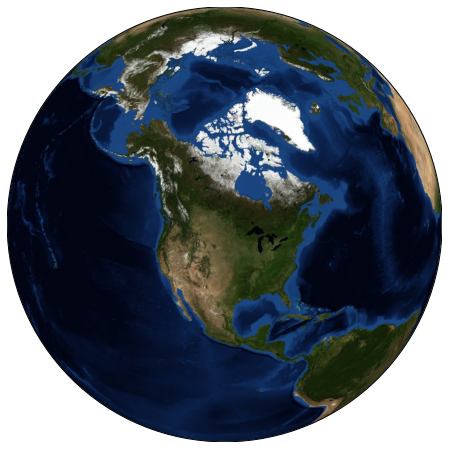

In [2]:
plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None, lat_0=50, lon_0=-100)
m.bluemarble(scale=0.5)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(2347268.222744085, 4518079.266407731, 'Seattle')

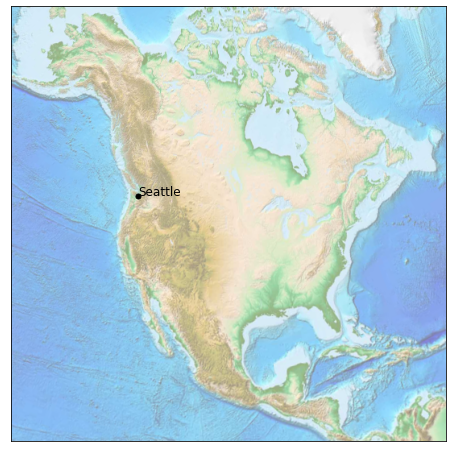

In [4]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None, width=8E6, height=8E6, lat_0=45, lon_0=-100)
m.etopo(scale=0.5, alpha=0.5)

x, y = m(-122.3, 47.6)
plt.plot(x, y, 'ok', markersize=5)
plt.text(x, y, 'Seattle', fontsize=12)

In [10]:
from itertools import chain
def draw_map(m, scale=0.2):
        m.shadedrelief(scale=scale)
        
        lats = m.drawparallels(np.linspace(-90, 90, 13))
        lons = m.drawmeridians(np.linspace(-180, 180, 13))
        
        lat_lines = chain(*(tup[1][0] for tup in lats.items()))
        lon_lines = chain(*(tup[1][0] for tup in lons.items()))
        all_lines = chain(lat_lines, lon_lines)
        
        for line in all_lines:
            line.set(linestyle='-', alpha=0.3, color='w')

圆柱投影

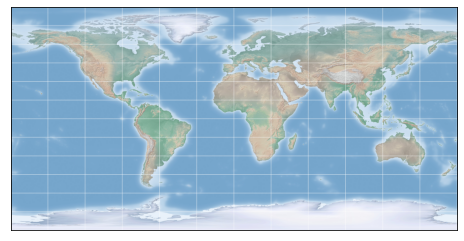

In [11]:
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(projection='cyl', resolution=None,
           llcrnrlat=-90, urcrnrlat=90,
           llcrnrlon=-180, urcrnrlon=180)
draw_map(m)

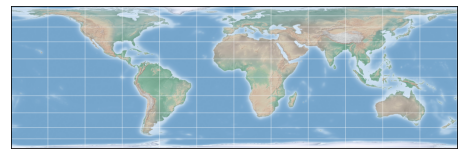

In [13]:
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(projection='cea', resolution=None,
           llcrnrlat=-90, urcrnrlat=90,
           llcrnrlon=-180, urcrnrlon=180)
draw_map(m)

伪圆柱投影

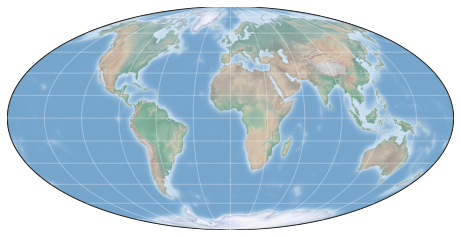

In [14]:
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(projection='moll', resolution=None,
           lat_0=0, lon_0=0)
draw_map(m)

透视投影

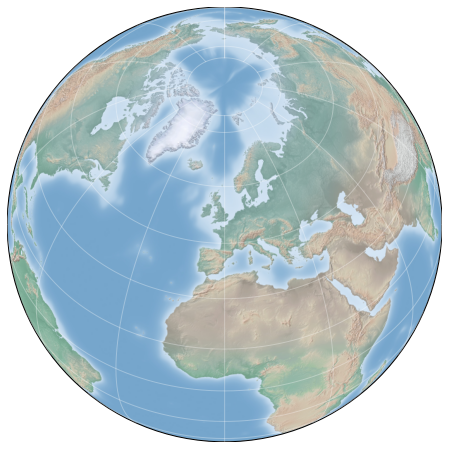

In [15]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None, lat_0=50, lon_0=0)
draw_map(m)

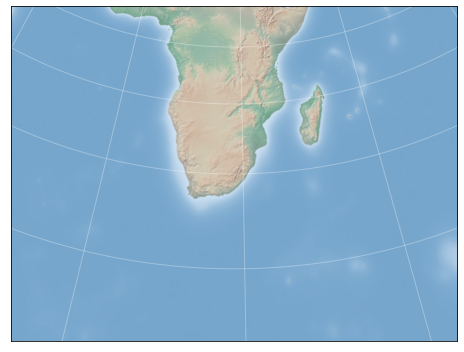

In [18]:
fig= plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc',resolution=None,
           lon_0=28, lat_0=-30, lat_1=28, lat_2=30.5,width=1.6E7,height=1.2E7)
draw_map(m)

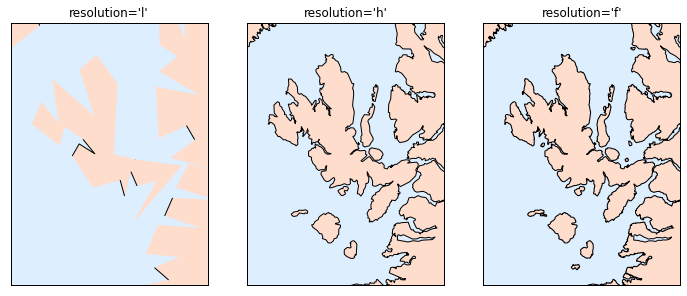

In [21]:
fig, ax = plt.subplots(1, 3, figsize=(12, 8))
for i, res in enumerate(['l', 'h', 'f']):
    m = Basemap(projection='gnom', lat_0=57.3, lon_0=-6.2,
               width=90000, height=120000, resolution=res, ax=ax[i])
    m.fillcontinents(color='#FFDDCC', lake_color='#DDEEFF')
    m.drawmapboundary(fill_color='#DDEEFF')
    m.drawcoastlines()
    ax[i].set_title("resolution='{0}'".format(res))

In [22]:
import pandas as pd
cities = pd.read_csv('california_cities.csv')

cities.head()

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
2,2,Alameda,37.756111,-122.274444,NaN,33.0,75467,22.960,10.611,12.349,59.465,27.482,31.983,53.79
3,3,Albany,37.886944,-122.297778,NaN,43.0,18969,5.465,1.788,3.677,14.155,4.632,9.524,67.28
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01


In [23]:
lat = cities['latd'].values
lon = cities['longd'].values
population = cities['population_total'].values
area = cities['area_total_km2'].values

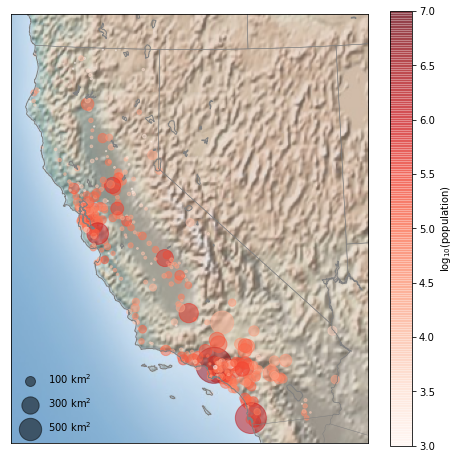

In [25]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='h',
           lat_0=37.5, lon_0=-119,
           width=1E6, height=1.2E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

m.scatter(lon, lat, latlon=True,
         c=np.log10(population), s=area,
         cmap='Reds', alpha=0.5)

plt.colorbar(label=r'$\log_{10} (\rm population)$')
plt.clim(3, 7)

for a in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.5, s=a, label=str(a)+' km$^2$')
    
plt.legend(scatterpoints=1, frameon=False,
          labelspacing=1, loc='lower left')

In [26]:
from netCDF4 import Dataset
data = Dataset('gistemp250_GHCNv4.nc')

In [28]:
data

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    title: GISTEMP Surface Temperature Analysis
    institution: NASA Goddard Institute for Space Studies
    source: http://data.giss.nasa.gov/gistemp/
    Conventions: CF-1.6
    history: Created 2021-07-09 10:49:13 by SBBX_to_nc 2.0 - ILAND=250,  IOCEAN=none,     Base: 1951-1980
    dimensions(sizes): lat(90), lon(180), time(1698), nv(2)
    variables(dimensions): float32 lat(lat), float32 lon(lon), int32 time(time), int32 time_bnds(time, nv), int16 tempanomaly(time, lat, lon)
    groups: 

In [29]:
from netCDF4 import date2index
from datetime import datetime
timeindex = date2index(datetime(2014, 1, 15), data.variables['time'])

In [30]:
lat = data.variables['lat'][:]
lon = data.variables['lon'][:]
lon, lat = np.meshgrid(lon, lat)
temp_anomaly = data.variables['tempanomaly'][timeindex]

<ipython-input-31-dc7a41577561>:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  m.pcolormesh(lon, lat, temp_anomaly, latlon=True, cmap='RdBu_r')


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 24230 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 24230 missing from current font.
  font.set_text(s, 0, flags=flags)


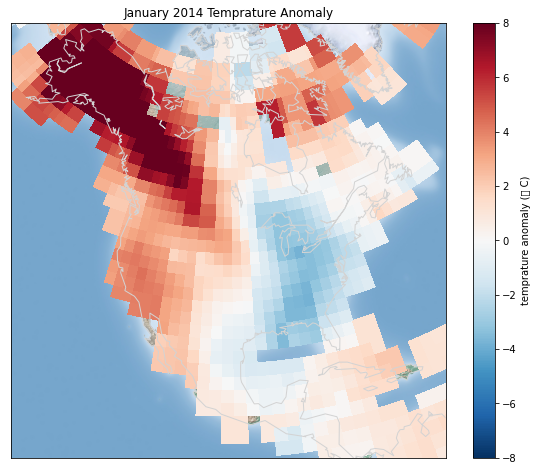

In [31]:
fig = plt.figure(figsize=(10, 8))
m = Basemap(projection='lcc', resolution='c',
           width=8E6, height=8E6,
           lat_0=45, lon_0=-100)
m.shadedrelief(scale=0.5)
m.pcolormesh(lon, lat, temp_anomaly, latlon=True, cmap='RdBu_r')
plt.clim(-8,8)
m.drawcoastlines(color='lightgray')

plt.title('January 2014 Temprature Anomaly')
plt.colorbar(label='temprature anomaly (度 C)')